**Snapshots**: https://www.tng-project.org/data/downloads/TNG300-1/

In [29]:
import numpy as np 

import pickle

In [30]:
import matplotlib.pyplot as plt

In [31]:
trees_file = "../../data/processed/tng/TNG300-1_cut_trees.p"
tng_snapshot_dir = "../../data/processed/tng/TNG300-1/"  # everything is a host halo
present_snapfile = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5"
snaps = np.arange(0, 100, 1)

In [92]:
tng_h = 0.6774

In [114]:
def _convert_tng_mass(gmass):
    return np.log10(gmass * 1e10 / tng_h)

In [148]:
def _reverse_trees(trees):
    """Reverse each entry in trees so that order is from early to late times."""
    for tree in trees:
        for key in tree.keys():
            if key not in ["Number", "ChunkNumber", "TreeID"]:
                tree[key] = tree[key][::-1]
    return trees

## Explore tree file

In [150]:
# load pickle file
with open(trees_file, 'rb') as pickle_file:
    _trees = pickle.load(pickle_file)
    trees = _reverse_trees(_trees)

In [151]:
trees[81]

{'Number': 12,
 'ChunkNumber': 0,
 'IndexInChunk': array([611696, 611695, 611694, 611693, 611692, 611691, 611690, 611689,
        611688, 611687, 611686, 611685]),
 'SnapNum': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int16),
 'SubhaloGrNr': array([ 6927, 28757, 79309, 41529, 55447, 64918,  6415,  5895,  6645,
         3134,  3444,  2515], dtype=int32),
 'SubhaloID': array([611696, 611695, 611694, 611693, 611692, 611691, 611690, 611689,
        611688, 611687, 611686, 611685]),
 'FirstSubhaloInFOFGroupID': array([611696, 611695, 611694, 611693, 611692, 611691, 611690, 611689,
        611688, 611687, 611686, 611685]),
 'Group_M_TopHat200': array([0.08539786, 0.21722278, 0.28631034, 0.39594445, 0.6076933 ,
        0.774242  , 1.7010435 , 3.0297496 , 4.0866766 , 5.2153816 ,
        5.9118204 , 8.6583395 ], dtype=float32),
 'GroupMass': array([ 0.10857566,  0.28274322,  0.29762894,  0.64737654,  0.75367105,
         0.88009185,  3.440754  ,  4.5332565 ,  5.5500035 ,  9.

In [91]:
sum(99 in t['SnapNum'] for t in trees)

12522

## TNG explore file

In [32]:
# explore one tng file
import h5py
import numpy as np
one_file = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5" # everything is a host halo
f = h5py.File(one_file, 'r')

In [33]:
list(f.keys())

['Halos']

In [34]:
f['Halos'].keys()

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values', 'block2_items', 'block2_values']>

In [35]:
ds = f['Halos']['axis0']
ds[:].shape, ds[:]

((210,),
 array([b'HaloID', b'SubhaloID', b'SubhaloID_DMO', b'SubhaloID_LastDesc',
        b'Central', b'Main', b'Mvir_TNG', b'Rvir_TNG', b'pos_x', b'pos_y',
        b'pos_z', b'vel_x', b'vel_y', b'vel_z', b'delta_2cMpc',
        b'delta_5cMpc', b'delta_10cMpc', b'delta_20cMpc', b'delta_40cMpc',
        b'cvir_init', b'cvir_init_err', b'rho_s_init', b'rho_s_init_err',
        b'Bound_Nfrac', b'Bound_Mfrac', b'Bound_Nfrac_SUBFIND', b'Rvir',
        b'Mvir', b'R200c', b'M200c', b'R500c', b'M500c', b'R2500c',
        b'M2500c', b'Core_vel_x', b'Core_vel_y', b'Core_vel_z', b'Ngas',
        b'Nstars', b'Nbhs', b'Mgas_vir', b'Zgas_vir', b'SFR_vir', b'Y_vir',
        b'Tm_vir', b'K_vir', b'Mgas_200c', b'Zgas_200c', b'SFR_200c',
        b'Y_200c', b'Tm_200c', b'K_200c', b'Mgas_500c', b'Zgas_500c',
        b'SFR_500c', b'Y_500c', b'Tm_500c', b'K_500c', b'Mgas_2500c',
        b'Zgas_2500c', b'SFR_2500c', b'Y_2500c', b'Tm_2500c', b'K_2500c',
        b'Mgas_10pkpc', b'Zgas_10pkpc', b'SFR_10pkpc', 

In [36]:
ds = f['Halos']['axis1']
ds[:]

array([    0,     1,     2, ..., 13640, 13641, 13642])

In [37]:
ds = f['Halos']['block0_values']
ds[:].shape

(13643, 205)

In [38]:
ds = f['Halos']['block1_items']
ds[:]

array([b'HaloID', b'SubhaloID', b'SubhaloID_DMO', b'SubhaloID_LastDesc'],
      dtype='|S18')

In [39]:
ds = f['Halos']['block1_values']
ds[:].shape

(13643, 4)

In [40]:
ds = f['Halos']['block2_items']
ds[:]

array([b'EndState'], dtype='|S8')

In [41]:
ds = f['Halos']['block2_values']
ds[:].shape

(1,)

### Extract relevant quantities

In [42]:
data = {}

In [43]:
# from 'block1' we just neeed halo_id
names = ['halo_id', 'subhalo_id']
keys = [b'HaloID', b'SubhaloID']
for name, key in zip(names, keys):
    idx = np.where(f['Halos']['block1_items'][:] == key)[0].item()
    data[name] = f['Halos']['block1_values'][:,idx]

# halo_id = f['Halos']['block1_values'][:,0]
# mvir = f['Halos']['block0_values'][:,1]

In [44]:
# from 'block0' we need mvir
names = ['mvir', 'm200', 'rvir', 'r200', 'm500', 'r500']
keys = [b'Mvir', b'M200c', b'Rvir', b'R200c', b'M500c', b'R500c']
for name, key in zip(names, keys):
    idx = np.where(f['Halos']['block0_items'][:] == key)[0].item()
    data[name] = f['Halos']['block0_values'][:,idx]

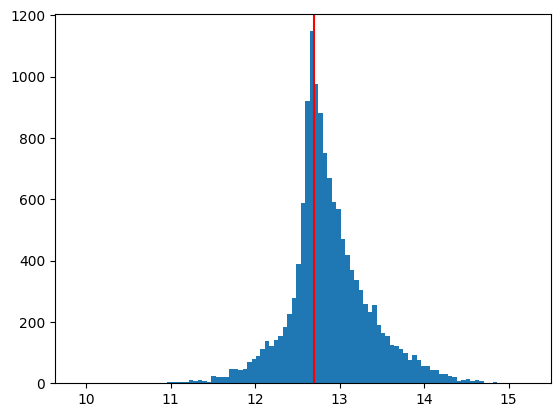

In [50]:
_, bins, _ = plt.hist(data['mvir'], bins=101); 
# plt.hist(data['m200'], bins=bins)
plt.axvline(12.7, c='r')

## Sanity check one MAH

In [116]:
metadata = pandas.read_csv("../../data/processed/tng/tng300-1-table.csv")

zs = metadata['Redshift'].values
scales = 1 / (1 + zs)

In [117]:
# load pickle file
with open(trees_file, 'rb') as pickle_file:
    trees = pickle.load(pickle_file)

cat = pandas.read_hdf(present_snapfile)

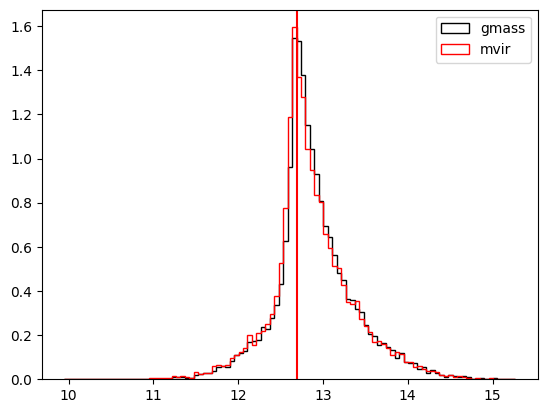

In [118]:
gmass = [_convert_tng_mass(t['Group_M_TopHat200'][0]) for t in trees1]
_, bins, _ = plt.hist(gmass, bins=101, histtype='step', color='k', density=True, label='gmass');
_ = plt.hist(cat['Mvir'].values, bins=bins, histtype='step', color='r', density=True, label='mvir');
plt.axvline(12.7, c='r')
plt.legend()

In [120]:
# Lets pick a halo in the mass complete sample (mvir > 12.7 ~ Group_M_TopHat200)

# pick tress that have present day snap
trees1 = [t for t in trees if 99 in t['SnapNum']]

# now pick trees that have Group_M_TopHat200 > 12.8 (some margin)
gmass = np.array([_convert_tng_mass(t['Group_M_TopHat200'][0]) for t in trees1])
trees2 = [t for ii, t in enumerate(trees1) if gmass[ii] > 12.8]
len(trees2), len(trees1)

(6567, 12522)

In [121]:
# lets pick one of these trees
t_idx = 0
t = trees2[t_idx]
t

{'Number': 99,
 'ChunkNumber': 0,
 'IndexInChunk': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 'SnapNum': array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
        82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
        65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
        48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
        31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
        14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
       dtype=int16),
 'SubhaloGrNr': array([   0

In [123]:
t['Group_M_TopHat200'].shape

(99,)

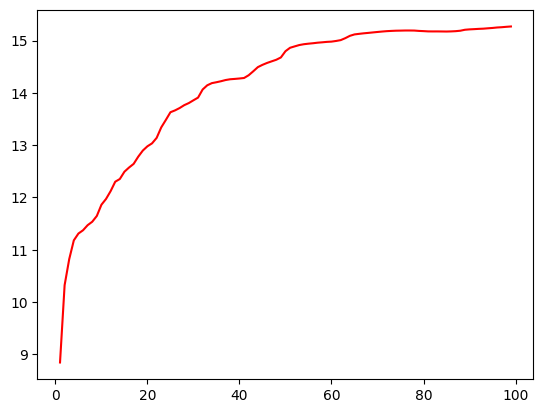

In [125]:
#let's plot gmass of this tree over time 
snaps_t = t['SnapNum']
gmass_t = _convert_tng_mass(t['Group_M_TopHat200'])
plt.plot(snaps_t, gmass_t, '-', c='r')

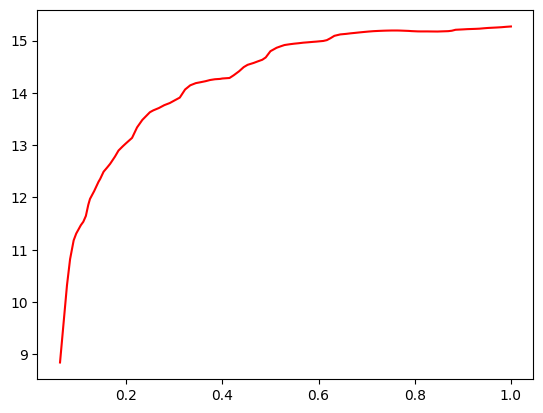

In [133]:
# now with redshift 
snaps_t = t['SnapNum'][::-1] # early to late
gmass_t = _convert_tng_mass(t['Group_M_TopHat200'])[::-1] # early to late
plt.plot(scales[snaps_t], gmass_t, '-', c='r')


## Match with trees 

In [4]:
import pandas

In [6]:
cat = pandas.read_hdf(present_snapfile)

In [13]:
for c in cat.columns:
    print(c)

HaloID
SubhaloID
SubhaloID_DMO
SubhaloID_LastDesc
Central
Main
Mvir_TNG
Rvir_TNG
pos_x
pos_y
pos_z
vel_x
vel_y
vel_z
delta_2cMpc
delta_5cMpc
delta_10cMpc
delta_20cMpc
delta_40cMpc
cvir_init
cvir_init_err
rho_s_init
rho_s_init_err
Bound_Nfrac
Bound_Mfrac
Bound_Nfrac_SUBFIND
Rvir
Mvir
R200c
M200c
R500c
M500c
R2500c
M2500c
Core_vel_x
Core_vel_y
Core_vel_z
Ngas
Nstars
Nbhs
Mgas_vir
Zgas_vir
SFR_vir
Y_vir
Tm_vir
K_vir
Mgas_200c
Zgas_200c
SFR_200c
Y_200c
Tm_200c
K_200c
Mgas_500c
Zgas_500c
SFR_500c
Y_500c
Tm_500c
K_500c
Mgas_2500c
Zgas_2500c
SFR_2500c
Y_2500c
Tm_2500c
K_2500c
Mgas_10pkpc
Zgas_10pkpc
SFR_10pkpc
Y_10pkpc
Tm_10pkpc
K_10pkpc
Mgas_30pkpc
Zgas_30pkpc
SFR_30pkpc
Y_30pkpc
Tm_30pkpc
K_30pkpc
Mgas_100pkpc
Zgas_100pkpc
SFR_100pkpc
Y_100pkpc
Tm_100pkpc
K_100pkpc
Mstar_vir
Zstar_vir
tstar_vir
Mstar_200c
Zstar_200c
tstar_200c
Mstar_500c
Zstar_500c
tstar_500c
Mstar_2500c
Zstar_2500c
tstar_2500c
Mstar_10pkpc
Zstar_10pkpc
tstar_10pkpc
Mstar_30pkpc
Zstar_30pkpc
tstar_30pkpc
Mstar_100pkpc
Zstar